# Aula 07 - Agrupamento hierárquico e redução de dimensionalidade

Até o momento em nosso módulo, discutimos questões sobre separabilidade linear e não linear de classes de dados, situação em que introduzimos a noção de algoritmos baseados em **vetores suporte** e entendemos como o uso do *kernel trick* pode nos auxiliar em diversas situações quando os dados não são linearmente separáveis. Em seguida, iniciamos nossa discussão sobre **métodos de boosting**, em que focamos nos algoritmos de *AdaBoost* e *GradientBoosting*.

Por fim, a parte final do nosso módulo vem tratando sobre aprendizagem não supervisionada. Até o momento, nos familiarizamos com dois dos principais métodos utilizados: o **K-Means** e o **DBSCAN**. Na aula de hoje, vamos finalizar os novos assuntos do módulo, ainda em aprendizagem não supervisionada, com a análise de **agrupamento hierárquico** e **redução de dimensionalidade**.

## 1. Agrupamento hierárquico

### Hierarchical clustering

O clustering hierárquico (também chamado de análise de cluster hierárquica ou HCA) é um método de análise de cluster que **busca construir uma hierarquia de clusters**.

Existem 2 tipos de agrupamento hierárquico:
- <b> Aglomerativo </b> (de baixo para cima) e
- <b> Divisivo </b> (de cima para baixo).

Os algoritmos ascendentes tratam cada ponto de dados como um único cluster e mesclam os clusters mais próximos, subindo na hierarquia até que todos os clusters tenham sido mesclados, e reste apenas um único cluster com todos os pontos de dados restantes.

Já os algoritmos "de cima para baixo" funcionam de maneira oposta: eles começam com um cluster que contém todos os pontos de dados e, em seguida, executam divisões para descer na hierarquia. 

Em ambos os casos, podemos visualizar a hierarquia usando um <a href="https://en.wikipedia.org/wiki/Dendrogram"> dendrograma </a> ou árvore.

___

**Métodos Aglomerativos.** Nesse caso, todos os elementos começam separados e vão sendo agrupados em etapas, um a um, até que tenhamos um único cluster com todos os elementos. O número ideal de clusters é escolhido dentre todas as opções.  

**Métodos Divisivos.** Todos os elementos começam juntos em um único cluster, e vão sendo separados um a um, até que cada elemento seja seu próprio cluster. Assim como no método aglomerativo, escolhemos o número ótimo de clusters dentre todas as possíveis combinações.

___

**Vamos entender em um pouco mais de detalhes.**

Imaginemos uma situação em que desejemos agrupar um conjunto de dados quaisquer. Conforme a ilustração abaixo, imaginemos que nossos dados são representados pelos oito pontos rotulados de 'a' a 'h'. No método aglomerativo, começamos por considerar que cada um dos pontos é, por si só, um cluster isolado. À medida que **subimos na hierarquia**, consideramos que **dados similares devem pertencer a um mesmo cluster**. 

No exemplo da figura, com nosso critério de similaridade, consideramos que 'f' e 'g' são similares, em um dado nível da hierárquia, e, assim, podem ser aglomerados sob um único cluster "fg". Repetimos o processo até que tenhamos todos os dados sob um mesmo agrupamento.

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/20190508025311/781ff66c-b380-4a78-af25-80507ed6ff26-300x300.png">

[Fonte da imagem](https://acervolima.com/ml-clustering-hierarquico-clustering-aglomerativo-e-divisivo/)

A partir daí, podemos nos perguntar: **mas o quê, exatamente, consideramos como pontos "similares"?**

Há uma série de medidas que podem ser utilizadas para esse fim, sendo que a **distância euclidiana** é uma das mais usuais. Em outras palavras, isso significa dizer que esperamos que, em um espaço de features, observações similares estejam mais próximas entre si.

No gráfico abaixo, podemos ver um exemplo de como funciona o agrupamento hierárquico ascendente.
<img style="height:400px;"  src="https://miro.medium.com/max/257/0*iozEcRXXWXbDMrdG.gif">
<img style="height:400px;"  src="https://miro.medium.com/max/480/0*BfO2YN_BSxThfUoo.gif">


Passos (aglomerativo):
1. Trate cada ponto de dados como um único cluster.
2. Escolha uma medida de similaridade / dissimilaridade (métrica de distância como distância euclidiana, como uma medida de similaridade, e um critério de ligação que especifica a dissimilaridade de conjuntos como uma função das distâncias entre pares de observações).
3. Combine os dois clusters com a menor ligação, ou seja, os dois clusters que estão mais próximos de acordo com nossa medida escolhida.
4. Repita 3 até que tenhamos apenas um cluster com todos os pontos de dados.
5. Escolha quantos aglomerados queremos olhando para o dendrograma.

**Algumas observações:**
- O clustering hierárquico não exige que especifiquemos o número de clusters e podemos até selecionar qual número de clusters parece melhor, já que estamos construindo uma árvore.
- Além disso, o algoritmo não é sensível à escolha da métrica de distância; todos eles tendem a funcionar igualmente bem, enquanto com outros algoritmos de agrupamento, a escolha da métrica de distância é crítica.
- Um caso de uso particularmente bom de métodos de agrupamento hierárquico é quando os dados subjacentes têm uma estrutura hierárquica e você deseja recuperar a hierarquia; outros algoritmos de cluster não podem fazer isso.
- Essas vantagens do agrupamento hierárquico têm o custo de menor eficiência, pois tem uma complexidade de tempo de O (n³), ao contrário da complexidade linear de K-Means e GMM.

PS. O objeto AgglomerativeClustering executa um agrupamento hierárquico usando uma abordagem ascendente: cada observação começa em seu próprio cluster, e os clusters são sucessivamente mesclados. Os critérios de ligação determinam a métrica usada para a estratégia de fusão:
- **Ward** minimiza a soma das diferenças quadradas em todos os clusters. É uma abordagem de minimização de variância e, nesse sentido, é semelhante à função objetivo k-means, mas tratada com uma abordagem hierárquica aglomerativa.
- **A ligação máxima ou completa** minimiza a distância máxima entre as observações de pares de agrupamentos.
- **A ligação média** minimiza a média das distâncias entre todas as observações de pares de agrupamentos.
- **A ligação única** minimiza a distância entre as observações mais próximas de pares de clusters.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_0011.png)

https://medium.com/@will.lucena/agrupamento-hier%C3%A1rquico-329e30a9f32d

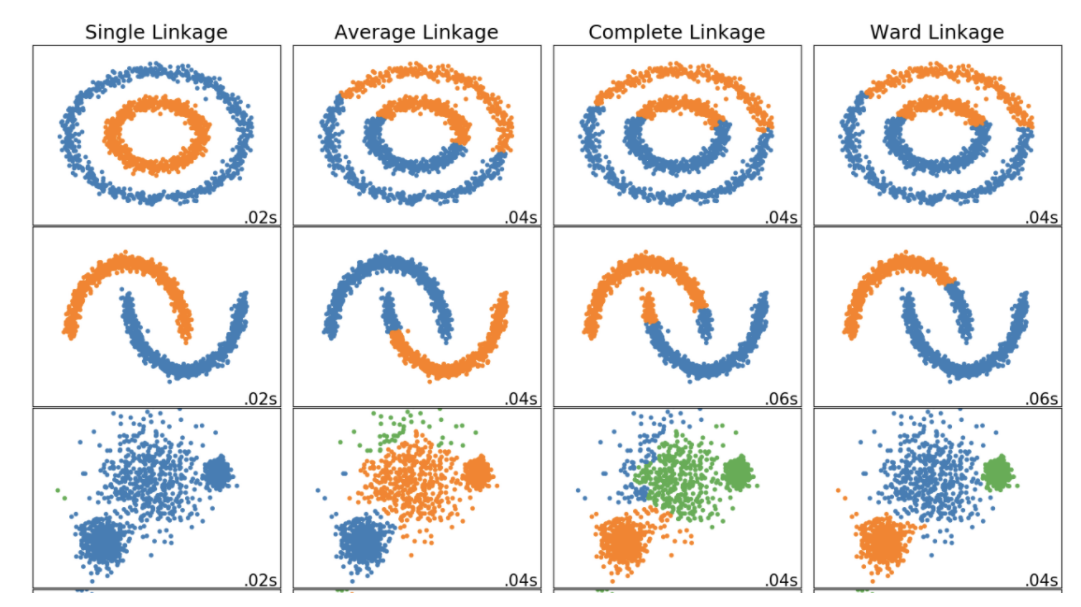

Uma visualização importante quando lidamos com os clusters hierárquicos é o chamado **dendrograma**: um tipo de gráfico em forma de "árvore" em que cada nó representa um cluster, e que dispomos a formação dos aglomerados segundo a nossa métrica de distância/similaridade.

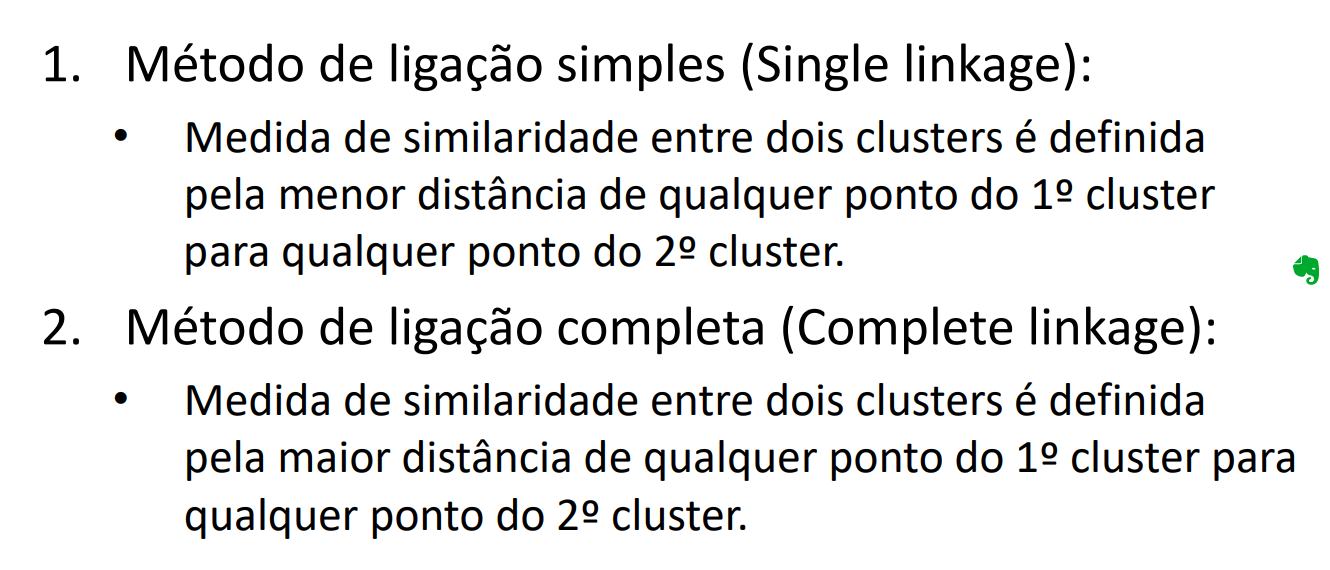https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8
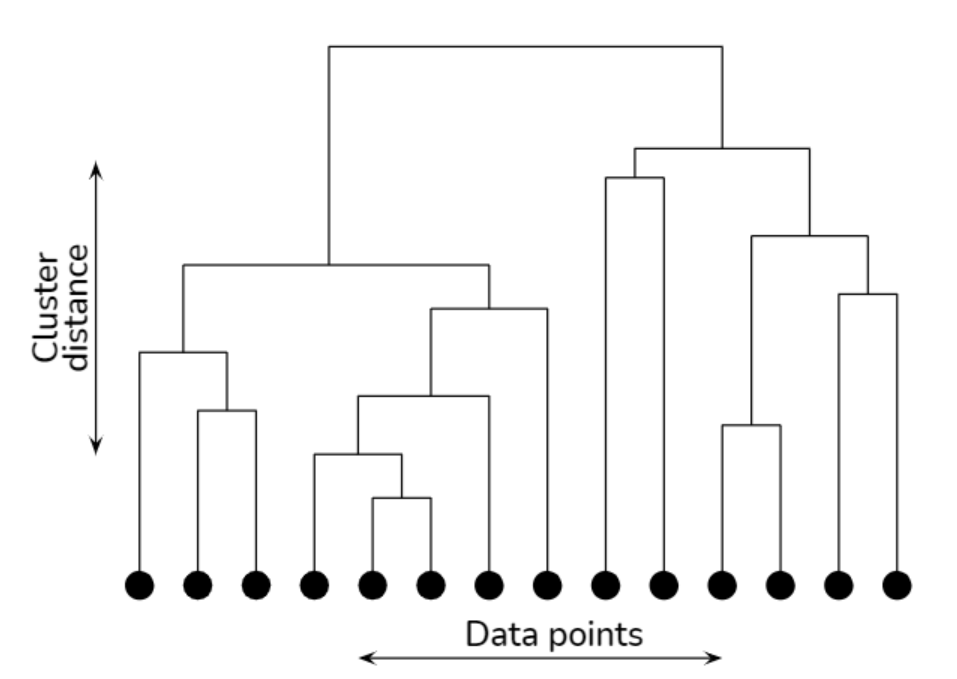
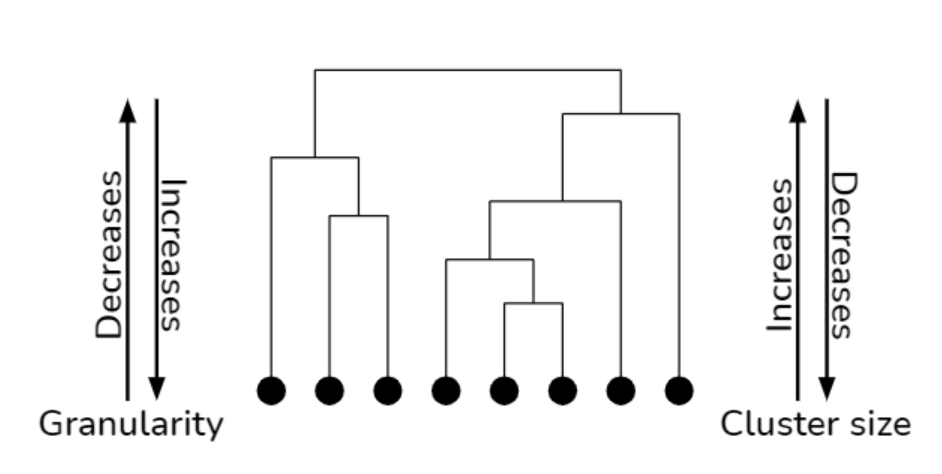
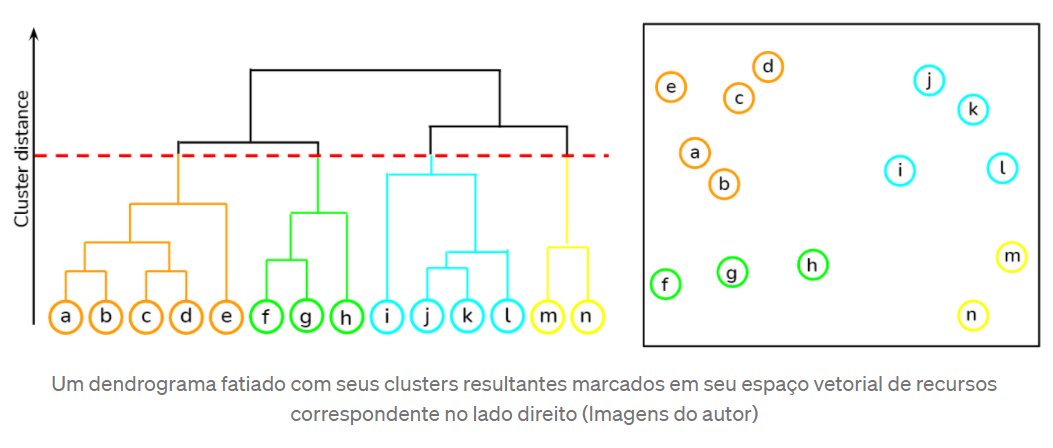
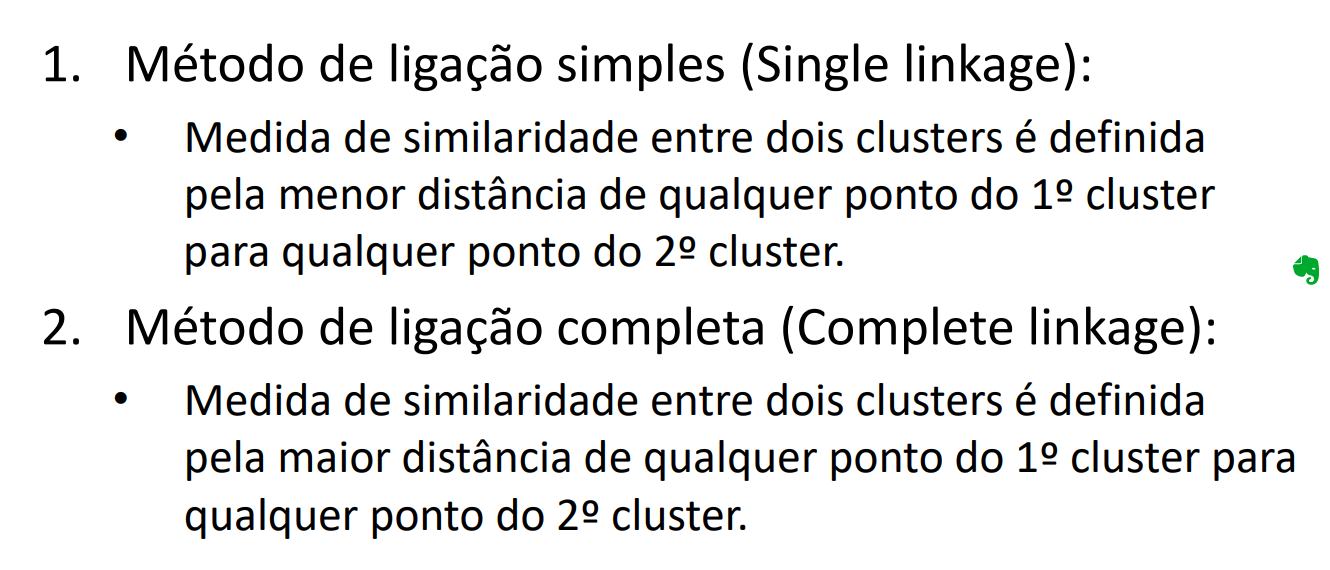
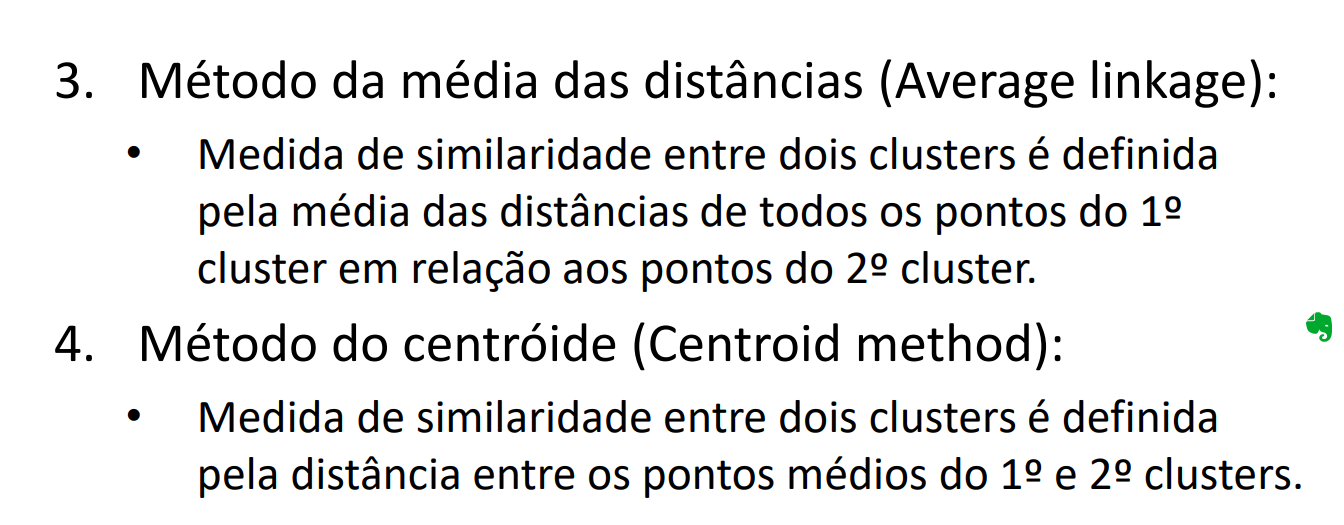
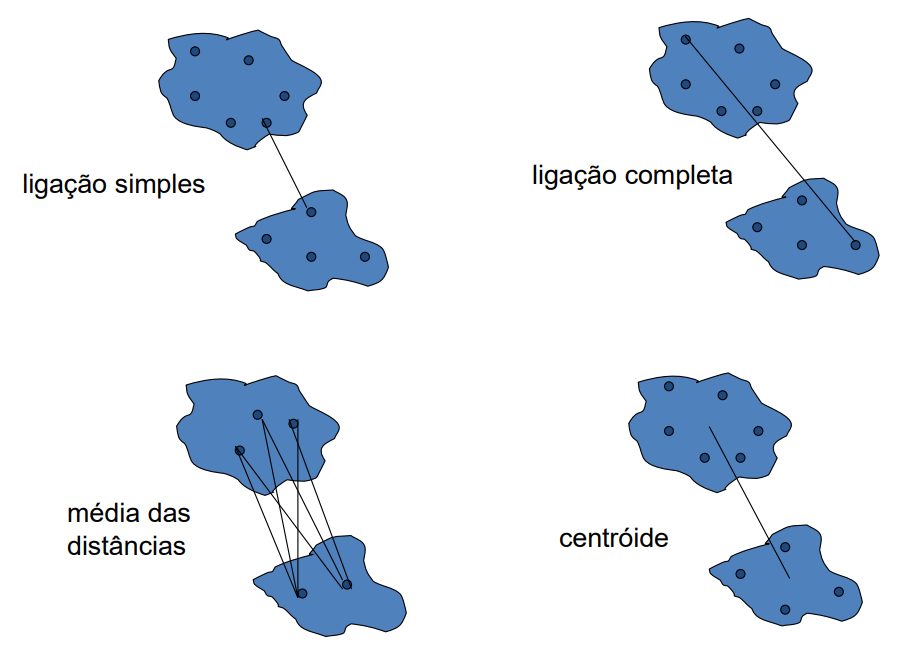
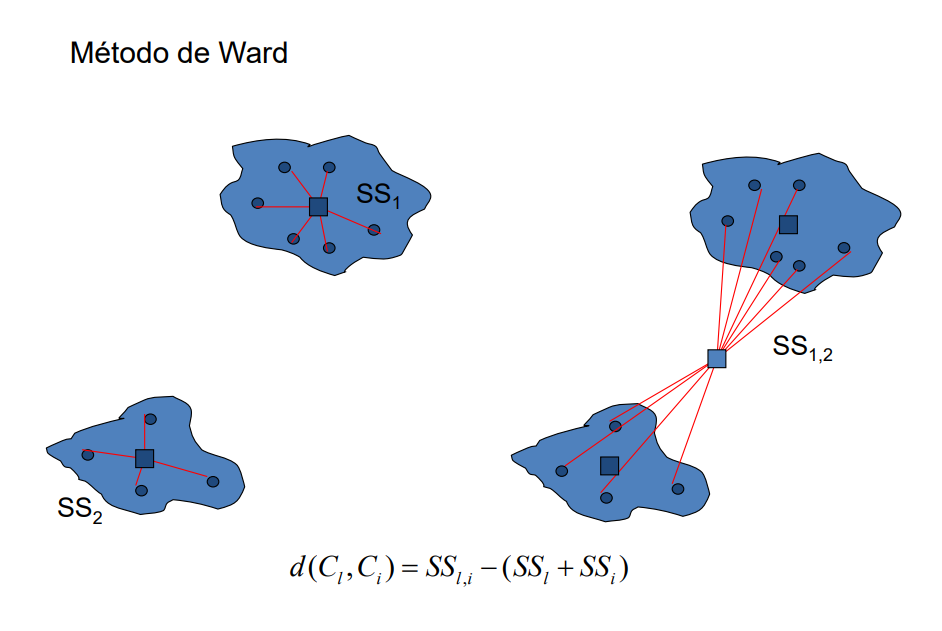
http://www.each.usp.br/lauretto/cursoR2017/04-AnaliseCluster.pdf



https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html



### Exemplo HCA

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df['score_group'] = df['Spending Score (1-100)'].apply(lambda x:
                                                      '< 25' if x < 25
                                                      else '< 50' if x < 50
                                                      else '< 75' if x < 75
                                                      else '75+')

In [6]:
df[['Spending Score (1-100)', 'score_group']]

,Spending Score (1-100),score_group
0,39,< 50
1,81,75+
2,6,< 25
3,77,75+
4,40,< 50
...,...,...
195,79,75+
196,28,< 50
197,74,< 75
198,18,< 25


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

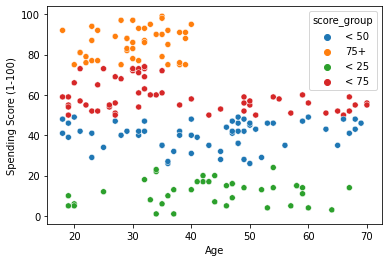

In [7]:
sns.scatterplot(data = df, y = 'Spending Score (1-100)', x = 'Age', hue = 'score_group')

In [14]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [15]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


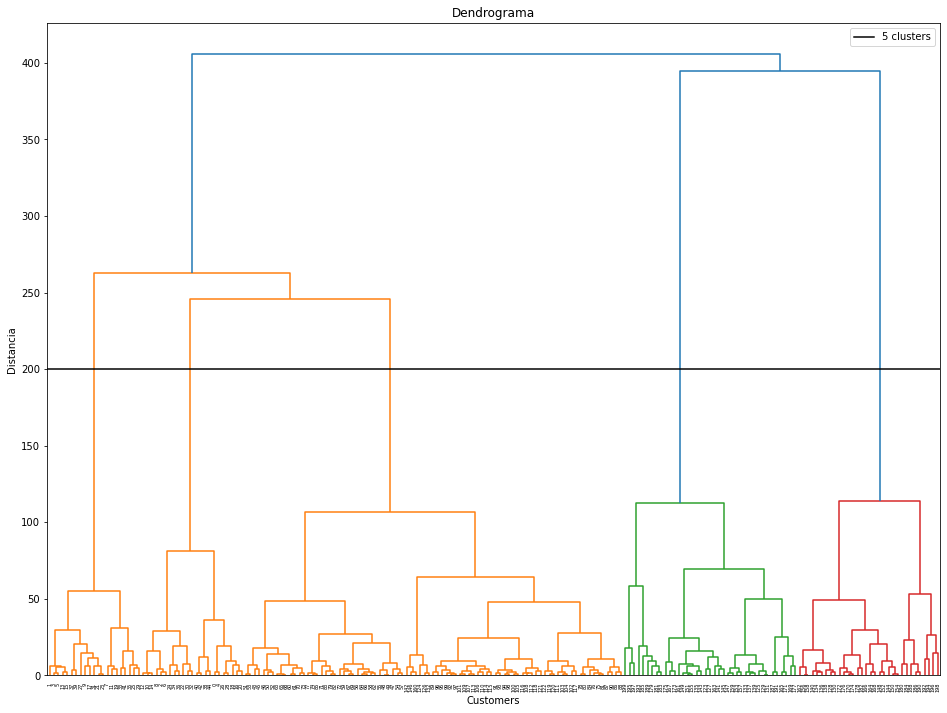

In [21]:
fig, ax = plt.subplots(figsize =(16,12))
dendrograma = sch.dendrogram(
    sch.linkage(X, method = "ward" )
)
ax.axhline(y = 200, color = "black", label = "5 clusters")
ax.legend()
ax.set_title("Dendrograma")
ax.set_xlabel("Customers")
ax.set_ylabel("Distancia")
plt.show()

In [19]:
X.shape

(200, 2)

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = "ward")

In [26]:
y_hc = hc.fit_predict(X)

In [27]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [28]:
import numpy as np

In [39]:
np.mean(X.iloc[y_hc == 0, 0])

89.40625

Text(0, 0.5, 'Spending Score (1-100)')

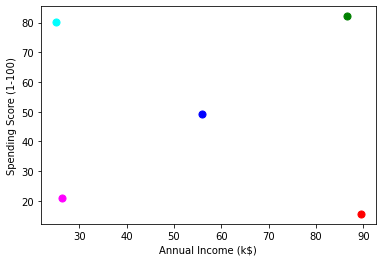

In [43]:
plt.scatter(np.mean(X.iloc[y_hc == 0, 0]), np.mean(X.iloc[y_hc == 0, 1]), s = 50, c = 'red')
plt.scatter(np.mean(X.iloc[y_hc == 1, 0]), np.mean(X.iloc[y_hc == 1, 1]), s = 50, c = 'blue')
plt.scatter(np.mean(X.iloc[y_hc == 2, 0]), np.mean(X.iloc[y_hc == 2, 1]), s = 50, c = 'green')
plt.scatter(np.mean(X.iloc[y_hc == 3, 0]), np.mean(X.iloc[y_hc == 3, 1]), s = 50, c = 'cyan')
plt.scatter(np.mean(X.iloc[y_hc == 4, 0]), np.mean(X.iloc[y_hc == 4, 1]), s = 50, c = 'magenta')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

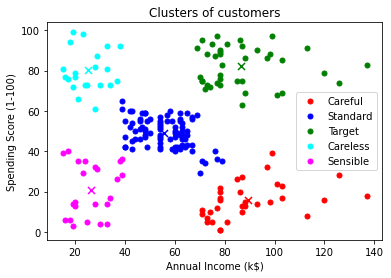

In [47]:
# Para visualizar os agrupamentos que fizemos, vamos definir alguns perfis de consumidores?
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 25, c = 'red', label = 'Careful')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 25, c = 'blue', label = 'Standard')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 25, c = 'green', label = 'Target')
plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 25, c = 'cyan', label = 'Careless')
plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 25, c = 'magenta', label = 'Sensible')

plt.scatter(np.mean(X.iloc[y_hc == 0, 0]), np.mean(X.iloc[y_hc == 0, 1]), s = 50, marker = 'x', c = 'red')
plt.scatter(np.mean(X.iloc[y_hc == 1, 0]), np.mean(X.iloc[y_hc == 1, 1]), s = 50, marker = 'x', c = 'blue')
plt.scatter(np.mean(X.iloc[y_hc == 2, 0]), np.mean(X.iloc[y_hc == 2, 1]), s = 50, marker = 'x', c = 'green')
plt.scatter(np.mean(X.iloc[y_hc == 3, 0]), np.mean(X.iloc[y_hc == 3, 1]), s = 50, marker = 'x', c = 'cyan')
plt.scatter(np.mean(X.iloc[y_hc == 4, 0]), np.mean(X.iloc[y_hc == 4, 1]), s = 50, marker = 'x', c = 'magenta')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Desse modo, criamos uma segmentação que identifica 5 perfis de consumidores, em uma distribuição de features que, inicialmente, era bastante difícil de segmentar!

A escolha do número de clusters é um tanto quanto arbitrária, e muito de sua definição vem justamente do problema de negócio que desejamos resolver.

## 2. Redução de Dimensionalidade

Quando lidamos com a visualização de duas, ou, até mesmo, três features simultaneamente, é possível recorrer a gráficos de dispersão sem grandes problemas. No entanto, como procedemos quando temos um conjunto maior de features?

Para essas, e outras, situações, podemos trabalhar com técnicas de **redução de dimensionalidade**. No geral, tais técnicas buscarão projeções dos dados sob algum critério, avaliando manter o máximo de informação, mesmo em espaços de menores dimensões.

Para avaliarmos um exemplo de utilização da técnica, vamos aplicá-la a um [conjunto de dados de uma pesquisa de Marketing](https://www.kaggle.com/datasets/mahdinavaei/customermarketing).

In [48]:
df = pd.read_csv('marketing_campaign.csv', sep=";")

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<AxesSubplot:>

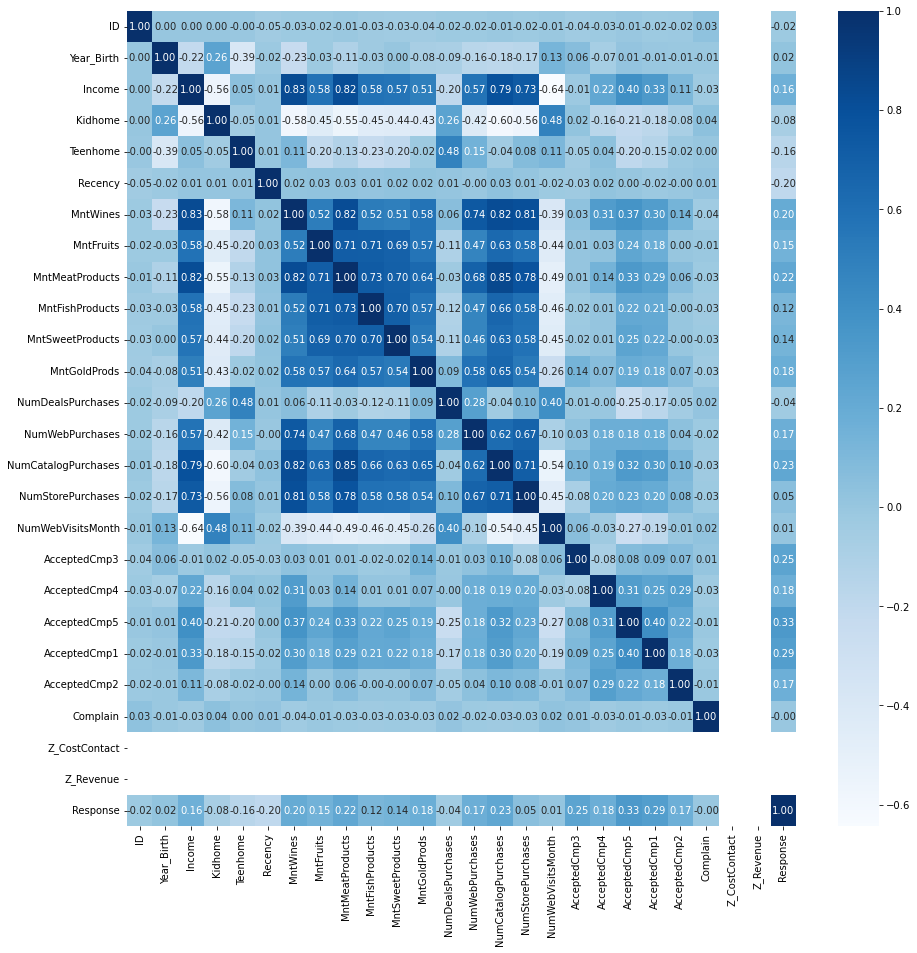

In [51]:
plt.figure(figsize = (15,15))
sns.heatmap(data = pd.get_dummies(df.corr(method = 'spearman')),
            annot = True,
           cmap = 'Blues',
           fmt = '.2f')

In [52]:
df.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)

<AxesSubplot:>

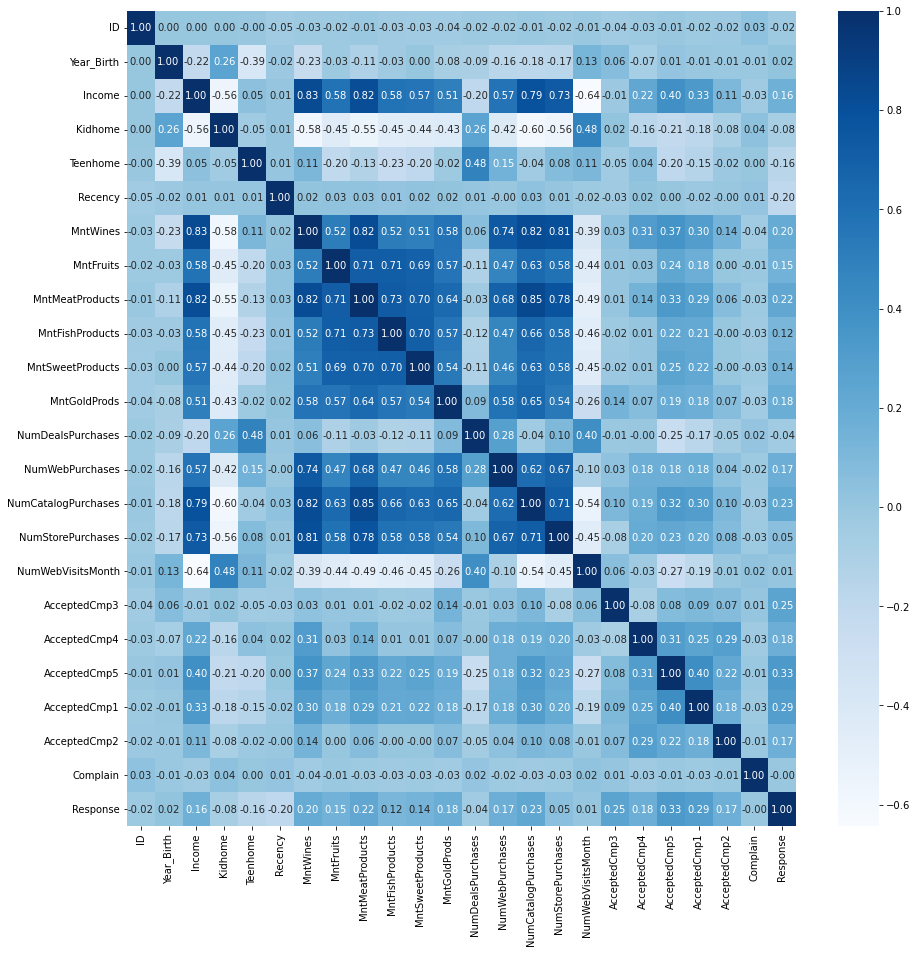

In [53]:
plt.figure(figsize = (15,15))
sns.heatmap(data = pd.get_dummies(df.corr(method = 'spearman')),
            annot = True,
           cmap = 'Blues',
           fmt = '.2f')

#### Análise de Componentes Principais (PCA)

A análise de componentes principais (PCA; *principal components analysis*) tem por objetivo obter uma projeção dos dados nas direções em que as **componentes principais** tenham máxima variância estatística. Isso significa que, após a projeção, passamos de um espaço original para um espaço de dimensões reduzidas, em que, inevitavelmente, perdemos um pouco de informação (pois estamos "descartando dimensões"). No entanto, ao manter as projeções que conservam a maior parte da variância nos dados, estamos, concomitantemente, tentando reter aquilo do dado que é mais informativo sobre eles!

Para saber em mais detalhes sobre o método:
- [Descrição de PCA na Wikipedia](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais)
- [PCA with Python](https://www.geeksforgeeks.org/principal-component-analysis-with-python/)
- [PCA for dummies](https://programmathically.com/principal-components-analysis-explained-for-dummies/)
- [A step-by-step explanation of PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png" width=800>

Vamos ver o método na prática?

In [55]:
df2 = pd.get_dummies(df.drop(columns = ['Dt_Customer', 'Year_Birth', 'ID']))
df2

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,0,1,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,1,0,0,0,0,0,1,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,0,0,1,0,0


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
df_scaled = StandardScaler().fit_transform(df2)

In [58]:
df3 = pd.DataFrame(df_scaled, columns = df2.columns)

In [59]:
df3

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894
1,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894
2,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
3,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
4,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,-0.444816,1.899751,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.356642,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,...,-0.444816,-0.526385,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894
2236,0.467539,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,...,-0.444816,1.899751,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894
2237,0.188091,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,...,-0.444816,-0.526385,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894
2238,0.675388,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,...,2.248122,-0.526385,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894


In [64]:
df4 = df3.dropna()

In [60]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components = 35)

In [66]:
pca.fit(df4)

PCA(n_components=35)

In [68]:
pca_data = pca.transform(df4)

In [70]:
pca_df = pd.DataFrame(pca_data, columns = [f"PCA_{i}" for i in range(1, 36)])

In [72]:
pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31,PCA_32,PCA_33,PCA_34,PCA_35
0,3.749307,-1.212513,0.185460,1.735119,-0.845091,-2.478314,-0.648564,-0.438910,-0.815323,-0.700782,...,-0.285114,0.925705,1.125806,0.731672,-0.236808,-0.198330,-0.829125,0.136873,5.111850e-16,1.496099e-16
1,-2.394138,-0.931916,0.341390,0.922525,-0.685090,-0.118925,-1.630157,-0.890222,-0.203941,-0.122034,...,0.066662,0.235086,0.340218,0.087491,-0.245765,-0.232809,-0.229740,-0.097551,1.781181e-16,9.409872e-17
2,1.633933,-0.993435,-0.999463,0.325585,-1.280931,0.968743,0.439380,0.580654,-0.741608,0.485122,...,0.815717,-0.593827,-0.109887,0.812720,0.752007,-0.076543,-0.210337,0.012255,-6.198547e-16,1.183848e-16
3,-2.390521,-1.152117,0.363734,0.735179,-1.131210,1.195882,0.603576,0.620591,-0.679402,0.696593,...,-0.127208,-0.190220,-0.389017,-0.059120,0.075984,-0.222450,-0.036553,-0.098905,-7.308770e-16,6.287370e-17
4,-0.410558,0.623579,-0.640126,-1.268222,1.422541,-0.159335,-0.617429,0.870916,-0.515768,-0.443060,...,0.375564,-0.259158,-0.243544,-0.182950,1.015136,-0.112322,-0.349779,0.094548,4.556739e-16,6.214547e-16


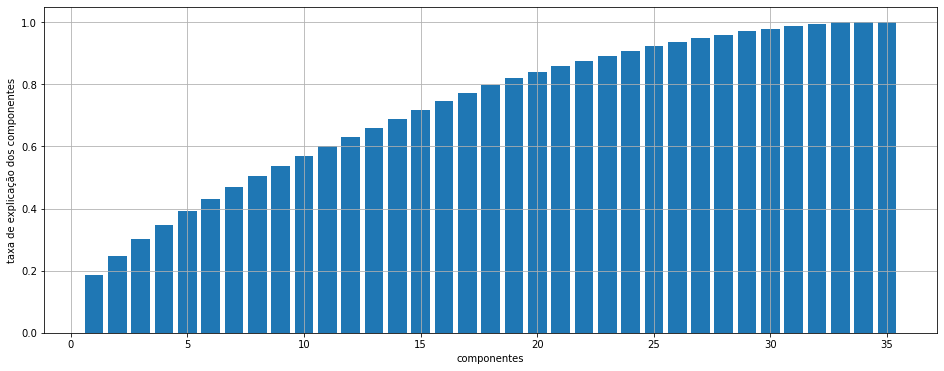

In [76]:
fig, ax = plt.subplots(figsize = (16,6))

ax.bar(range(1, 36), pca.explained_variance_ratio_.cumsum())
ax.set_ylabel("taxa de explicação dos componentes")
ax.set_xlabel("componentes")
plt.grid()

In [78]:
# Escolhido utilizar apenas 20 colunas 

pca = PCA(n_components = 20)
pca_data = pca.fit_transform(df4)
pca_df = pd.DataFrame(pca_data, columns = [f"PCA_{i}" for i in range(1, 21)])
pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20
0,3.749308,-1.212577,0.185583,1.735340,-0.844951,-2.478250,-0.649228,-0.436150,-0.812744,-0.699012,-0.126550,-0.118857,0.161790,0.012918,0.007375,-0.450923,0.067789,-1.159410,1.163462,-0.449393
1,-2.394138,-0.931943,0.341433,0.922583,-0.685099,-0.118834,-1.630397,-0.889328,-0.203250,-0.121464,-0.527192,0.531519,-0.218182,0.156447,0.244275,-0.656131,-0.040913,0.544152,-0.561901,1.066477
2,1.633933,-0.993485,-0.999416,0.325700,-1.280874,0.968836,0.439189,0.581954,-0.740818,0.485976,-0.010139,0.717636,0.609744,-0.271947,0.098018,-0.045107,-0.848048,0.326245,0.166114,-1.303403
3,-2.390521,-1.152151,0.363762,0.735232,-1.131225,1.195992,0.603459,0.621285,-0.679102,0.697069,-0.163120,0.699968,0.240123,-0.070955,0.041490,-0.376805,-0.448130,-0.421571,0.293514,-0.337586
4,-0.410557,0.623634,-0.640114,-1.268269,1.422567,-0.159535,-0.617611,0.870466,-0.515124,-0.443451,-0.397779,-1.298561,-0.305350,0.548190,0.216026,-0.143418,0.625181,-1.632353,1.294595,0.265272


In [79]:
pca_df.shape

(2216, 20)

In [80]:
df4.shape

(2216, 35)

O que o código acima fez:
- quando usamos o **.fit** em PCA, estamos encontrando uma **matriz de projeção** que leva os dados do espaço original para o espaço de componentes principais. No nosso caso, passamos de um espaço de **36 dimensões para apenas 2!**;
- quando utilizamos o **.transform**, aplicamos a projeção calculada no fit aos dados, levando-os ao espaço de componentes principais;
- vale notar que, ao fazermos isso, **perdemos um pouco de explicabilidade**. Nossas componentes principais são **combinações lineares das features originais!**

Em suma:

- com a PCA, buscamos projeções ortogonais (independentes) de componentes principais, com o objetivo de reduzir a dimensionalidade do problema sendo tratado, ao mesmo tempo em que buscamos conservar o máximo de informação possível;
- o número de componentes principais, a princípio, pode ser definido arbitrariamente. Entretanto, podemos computar métricas que nos indiquem "quanto de informação retemos", do dataset original, a fim de auxiliar nessa escolha;
- cada componente principal será uma **combinação linear** das features originais, mas podemos utilizá-la normalmente como qualquer outro tipo de atributo (mas é importante ter essa consideração em mente, pois afeta a explicabilidade do modelo!).

Para mais detalhes sobre esse parâmetro, vocês podem consultar, por exemplo, [esta explicação](https://vitalflux.com/pca-explained-variance-concept-python-example/).

____

#### Observações importantes

Com a análise ilustrativa de PCA, objetivamos obter uma intuição acerca da interpretação do método! Note que não consideramos diversas boas práticas que deveríamos ter adotado, como limpeza do conjunto de dados, tratamento de possíveis valores nulos etc. Poderíamos, inclusive, ter criado novas features, por exemplo, para denotar o consumo total, ou similares, caso julgássemos cabível.